## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read the dataset and store it in the dataframe
df = pd.read_csv('ab_data.csv')

#Load the first 5 rows in the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Display number of rows in the dataset using the shape property
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#Display number of unique users in the dataset using the nunique() method
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#Display the proportion of users with converted column has value =1
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Get the values in the group column
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [7]:
#Get the values in the landing_page column
df.landing_page.value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

In [8]:
#the new page and treatment don't line up in two cases:
# 1. Case1: group = treatment and landing_page = old_page
# 2. Case2: group = control and landing_page = new_page

mask_case1 = 'group == "treatment" and  landing_page =="old_page"'
mask_case2 = 'group == "control" and  landing_page =="new_page"'

not_treatment_newpage = df.query(mask_case1).count() + df.query(mask_case2).count()
not_treatment_newpage

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [9]:
# Check the null values in all coulmns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
#Check again the null values using the Sum method
df.isnull().sum().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Make copy of the dataframe
df_copy= df.copy()
df.shape[0]

294478

In [12]:
# Drop rows of treatment that not aligned with the new_page 
df_copy= df.drop(df.query(mask_case1).index)

# Drop rows of control that not aligned with the old_page 
df2 = df_copy.drop(df.query(mask_case2).index)

In [13]:
#Check the values which should be 
# df.shape[0] (294478) - the rows that not aligned (3893)
df2.shape[0]

290585

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [15]:
#Discover the new dataframe
df2.shape

(290585, 5)

In [16]:
#Check the first rows in the new dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. How many unique **user_id**s are in **df2**?

In [17]:
#Get the values of unique user ids in the dataframe
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
#Get the duplicated user ids count 
df2.user_id.duplicated().sum()

1

In [19]:
#Check the user id which is duplicated
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [20]:
#Get the rows information where the user id = 773192 which is the repeated user id
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [21]:
#Drop the duplicated row
df2.drop(2893, inplace= True)

In [22]:
#Check that the duplicated row removed
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
#the probability of the converted column
prob_converted = df2.converted.mean()
prob_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
#the prob of the converted column given that the user in the control group
prob_control_converted = df2.query('group=="control"')['converted'].mean()
prob_control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
#the prob of the converted column given that the user in the treatment group
prob_treatment_converted = df2.query('group=="treatment"')['converted'].mean()
prob_treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
#the prob of the individual received new page == prob of the new page with respect to all user who received new and old page
prob_newpage = df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]
prob_newpage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [27]:
#the prob of the individual received old page == prob of the old page with respect to all user who received new and old page
prob_oldpage = 1- prob_newpage
prob_oldpage

0.4999380557773312


#### From the results we found that :
##### 1. The prob of the user received the new page ~ 50% so that the population is divide aproximately equal between new and old page
##### 2. The prob of converted given that the person in the control group or the person in the treatment group almost the same 
#####     ~ 12% (the diff is very low)
####  3. The new treatment page didn't increase the conversion rate as expected (the coverted prob given treatment is less than given control)

#### Given that, there is  "NO" sufficient evidence to say that the new treatment page leads to more conversion 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<h3><center>H0: &nbsp;&nbsp;&nbsp;&nbsp; $p_{old}$ >= $p_{new}$</center></h3>
<h3><center>H1: &nbsp;&nbsp;&nbsp;&nbsp; $p_{old}$ < $p_{new}$</center></h3>


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
#Given that under null hypothesis p_new and p_old bot have true success rates equal to the converted success rate
#Also they are equal to the converted rate in ab_data.csv
p_new = df.converted.mean()
p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
#same like the above the p_old will bethe same as the converted rate in the dataset
p_old = df.converted.mean()
p_old

0.11965919355605512

c. What is $n_{new}$?

In [30]:
#Given that: sample size for each page equal to the ones in ab_data.csv
n_new = df2.query('landing_page=="new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [31]:
#Given that: sample size for each page equal to the ones in ab_data.csv
n_old = df2.query('landing_page=="old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
#use bionomial distribution to get the new_page converted 
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
#Mean for the new page converted with n_new elements of 0,1
new_page_converted_mean=new_page_converted.mean()
new_page_converted_mean

0.1208657353244787

In [34]:
#value_counts for the new page converted with n_new elements of 0,1
#print(# of 1 , # of zeros)
(new_page_converted.sum(), len(new_page_converted) - new_page_converted.sum())

(17563, 127747)

In [35]:
#Re-check using random.choice
new_page_converted2 = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted2

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
#Mean for the new page converted with n_new elements of 0,1 with random.choice
new_page_converted2_mean=new_page_converted2.mean()
new_page_converted2_mean

0.11946184020370243

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
#use bionomial distribution to get the old_page converted 
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
#Mean for the old page converted with n_old elements of 0,1
old_page_converted_mean=old_page_converted.mean()
old_page_converted_mean

0.11869295262744882

In [39]:
#value_counts for the old page converted with n_old elements of 0,1
#print(# of 1 , # of zeros)
(old_page_converted.sum(), len(old_page_converted) - old_page_converted.sum())

(17243, 128031)

In [40]:
#Re-check using random.choice
old_page_converted2 = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted2

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
#Mean for the old page converted with n_old elements of 0,1 with random.choice
old_page_converted2_mean=old_page_converted2.mean()
old_page_converted2_mean

0.11880997287883585

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [42]:
# Get the diff between new page converted mean and old page converted mean
diff = new_page_converted_mean - old_page_converted_mean
diff

0.0021727826970298764

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [43]:
#Identify values for the iterations
p_diffs=[]
size=10000

#Stimulate 10000 values of p_new - p_old
for _ in range(size):
    new_page_converted_mean = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted_mean = np.random.binomial(1,p_old,n_old).mean()
    p_diff = new_page_converted_mean - old_page_converted_mean
    p_diffs.append(p_diff)
    
#Convert to numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [44]:
# Get observed differnce value to display in histogram with the p_diffs array
obs_diff = prob_treatment_converted - prob_control_converted
obs_diff

-0.0015782389853555567

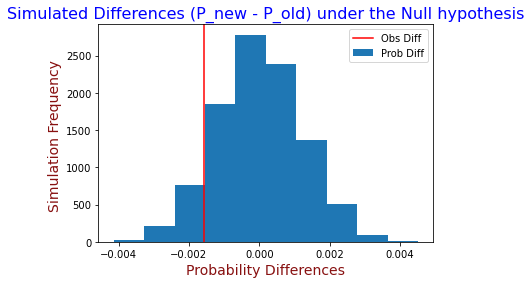

In [45]:
plt.hist(p_diffs, label="Prob Diff")
plt.axvline(x=obs_diff , color='red', label="Obs Diff")
plt.legend()
plt.xlabel('Probability Differences' , color="#881111", size="14")
plt.ylabel('Simulation Frequency ' , color="#881111", size="14")
plt.title('Simulated Differences (P_new - P_old) under the Null hypothesis', color="blue", size="16");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [46]:
#Mean of the values for p_diff that greater than obs_diff
(p_diffs > obs_diff).mean()

0.9043

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### From the value in point j We can say that: 
#### 1. The value computed is called p_value in scientific studies
#### 2. The p_value = 0.9051 which is larger than alpha (the Type 1 error rate ) which is 5% (0.05), with this result we fail to 
####      reject the null hypothethis 
#### 3. We don't have suffiecient evidence to prove that the new page conversion rate will be better than the old page conversion rate
#### 4. The old page is the same or better than the new page 


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [47]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = n_old
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [48]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
(z_score, p_value)

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### From value of z_score and p_value in point m, we can sya that:
#### 1. As the apha (Error Type 1 rate) given 0.05 and z_value calculated from point m 1.3109 ( between  -1.96 and +1.96 ) and 
####     p_value = 0.905 which is higher than 0.05, so we fail to reget the null hypothethis.
#### 2. This values mean that the old page conversion rate is the same or better than the new page conversion rate
#### 3. This values agree with what we found in j and k points

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### The dependant variable here has two values so we will study it as binary variable with values converted as 1 and not converted as 0 
#### So we will use Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [49]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [50]:
#Create dummy variable column for which page each user received
#Create two dummy variable columns for the group column one column for the control and ab_page column for treatment
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [51]:
#Remove the control column 
#So the only dummy column added to represent the page the customer received is the ab_page column
df2.drop('control', axis=1, inplace = True)

In [52]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [53]:
#Add the intercept column
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [56]:
#Identify the trained data for the model
Ytrain= df2['converted']
Xtrain= df2[['intercept','ab_page']]

#Instantiate and fit the model
log_mod = sm.Logit(Ytrain, Xtrain)
results = log_mod.fit()
#Display the summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-12-07 18:56 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [57]:
#Display the summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-12-07 19:05 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### From the above summary we can conclude that:
#### 1. The p_value associated with ab_page is 0.19 using the logistic regression model but it still not significient suffiencient to support the alternative hypotheses
#### 2. The p_value using the regression model differ from the p_value using A/B test due to the diffrence in the null and alterative hypotheses 
#### Null and alterative hypotheses for A/B Test are:

<h3><center>H0: &nbsp;&nbsp;&nbsp;&nbsp; $p_{old}$ >= $p_{new}$</center></h3>
<h3><center>H1: &nbsp;&nbsp;&nbsp;&nbsp; $p_{old}$ < $p_{new}$</center></h3>

#### Null and alterative hypotheses for Logistic Regression Model are:

<h3><center>H0: &nbsp;&nbsp;&nbsp;&nbsp; $p_{old}$ = $p_{new}$</center></h3>
<h3><center>H1: &nbsp;&nbsp;&nbsp;&nbsp; $p_{old}$ != $p_{new}$</center></h3>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Advatage of adding additional terms to regression model
#### 1. Adding more explantory variables lead to good understanding of the factors that affect the converted rate
#### 2. Adding other factors may help get more accurate results and may also help identify issues like outliers

#### Disadvatage of adding additional terms to regression model
#### 1. The model become more complex
#### 2. We need to make sure that there is no major coorelation between the additional term (additional explantory variable) and the current explantory variables used because if there is any major relation between the explantory variables lead to wrong results and this is called Multicolinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [58]:
# Load data from the file and save it in the dataframe
countries_df = pd.read_csv('./countries.csv')

#Join the countries dataframe with our dataframe df2
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [59]:
#Discover the dataframe
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [61]:
# Get the country values in the country column
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [66]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]  = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [67]:
#Remove the US column 
#So there is two dummy columns added to represent the country UK , CA
df_new.drop('US', axis=1, inplace = True)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,CA
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [69]:
#Add the intercept column
df_new['intercept'] = 1
#Identify the trained data for the model
Ytrain_df_new= df_new['converted']
Xtrain_df_new= df_new[['intercept', 'UK', 'CA']]

#Instantiate and fit the model
log_mod = sm.Logit(Ytrain_df_new, Xtrain_df_new)
results = log_mod.fit()
#Display the summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-12-07 21:16 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
==================================================================

"""

#### The p_value for the countries still greater than alpha (the critical value 0.05 ) so we don't have suffiecient evidence for the alternative hypotheses

#### As the results summary above the country doesn't appear to have impact in the converion rate

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

### We will use two method to solve this part

#### 1. Method 1 : Add the countries and ab_page columns in one regression model and get the results
#### 2. Method 2 : Get the intersection between country column and ab_page column and add them to 
####    two additional columns and then add them to the model beside the countries and ab_page column

### Method 1

In [71]:
#Identify the trained data for the model
Ytrain_df_new= df_new['converted']
Xtrain_df_new= df_new[['intercept','ab_page', 'UK', 'CA']]

#Instantiate and fit the model
log_mod = sm.Logit(Ytrain_df_new, Xtrain_df_new)
results = log_mod.fit()
#Display the summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-12-07 21:33 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

### Method 2

In [72]:
#Create new columns which are the interaction betweeen ab_page and countries (UK and CA)
df_new['uk_abpage'] = df_new.UK * df_new.ab_page
df_new['ca_abpage'] = df_new.CA * df_new.ab_page
#Descover dataframe after add the columns
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,CA,uk_abpage,ca_abpage
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [73]:
#Identify the trained data for the model
Ytrain_df_new= df_new['converted']
Xtrain_df_new= df_new[['intercept','ab_page', 'UK', 'uk_abpage','CA','ca_abpage']]

#Instantiate and fit the model
log_mod = sm.Logit(Ytrain_df_new, Xtrain_df_new)
results = log_mod.fit()
#Display the summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-12-07 21:50 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
uk_abpage     0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
ca_abpage    -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

#### From the above two methods we can coclude that:
#### The p_value for the countries and the ab_page  greater than alpha (Type 1 Error rate ~ 0.05 ) so we don't have suffiecient evidence for the alternative hypotheses

#### So from the above summary the country and the ab_page doesn't appear to have impact in the converion rate

<a id='conclusions'></a>
## Conclusions

### As conclusion from all the above (Probability , A/B test and Regression), there is no significant evidence that the new page is better than the old one 

### So We can say that the company should left the old page or re-implement new page 